Setup

In [15]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

Prepare the data

In [16]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Build the model

In [17]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

Train the model

In [18]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 15s 35ms/step - loss: 0.3760 - accuracy: 0.8857 - val_loss: 0.0781 - val_accuracy: 0.9798
Epoch 2/5
422/422 [==============================] - 14s 34ms/step - loss: 0.1096 - accuracy: 0.9668 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 3/5
422/422 [==============================] - 14s 33ms/step - loss: 0.0830 - accuracy: 0.9744 - val_loss: 0.0499 - val_accuracy: 0.9863
Epoch 4/5
422/422 [==============================] - 14s 33ms/step - loss: 0.0671 - accuracy: 0.9788 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 5/5
422/422 [==============================] - 14s 33ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0409 - val_accuracy: 0.9883


Evaluate the trained model

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03582359477877617
Test accuracy: 0.9882000088691711


In [20]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

non-dilated images

1/1 [==============================] - 0s 73ms/step
The number is probably a 5


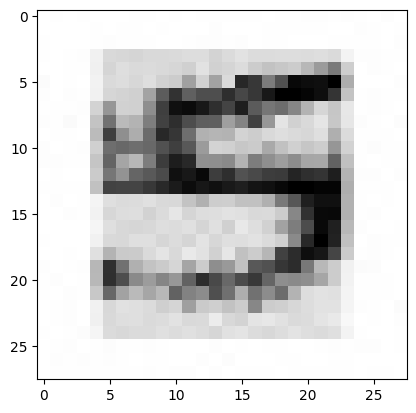

1/1 [==============================] - 0s 18ms/step
The number is probably a 4


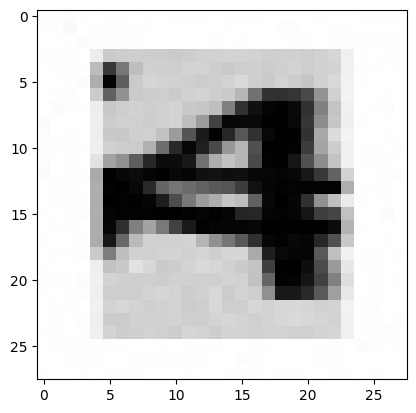

1/1 [==============================] - 0s 17ms/step
The number is probably a 8


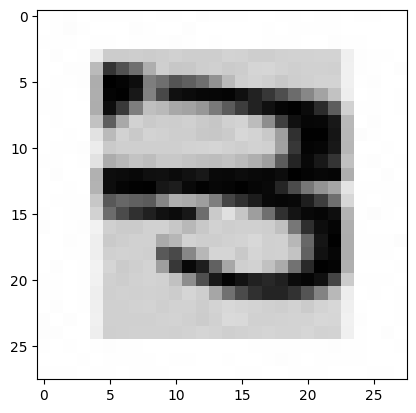

1/1 [==============================] - 0s 18ms/step
The number is probably a 5


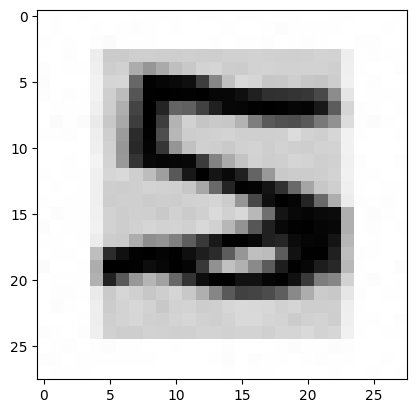

1/1 [==============================] - 0s 17ms/step
The number is probably a 3


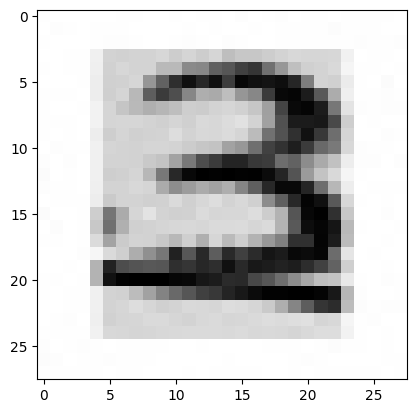

1/1 [==============================] - 0s 29ms/step
The number is probably a 4


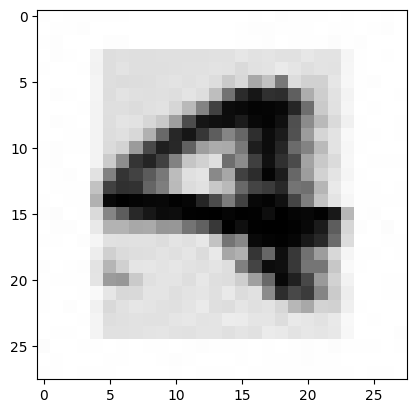

1/1 [==============================] - 0s 17ms/step
The number is probably a 9


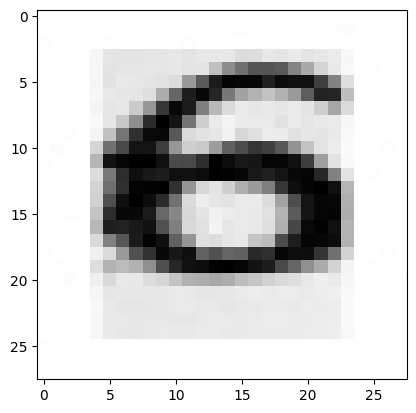

1/1 [==============================] - 0s 17ms/step
The number is probably a 8


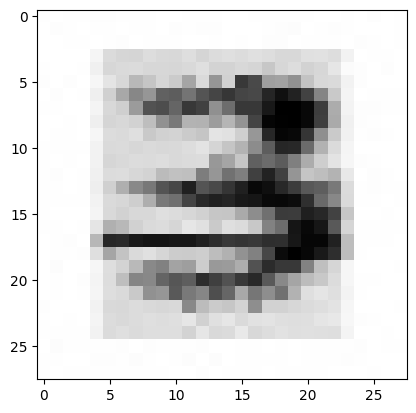

1/1 [==============================] - 0s 17ms/step
The number is probably a 3


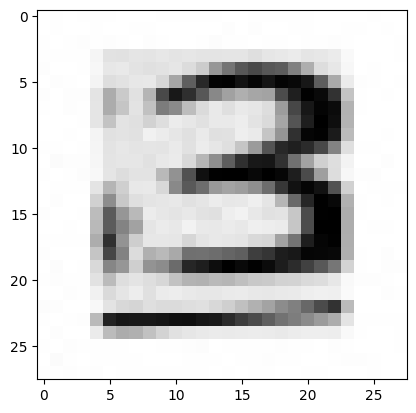

1/1 [==============================] - 0s 19ms/step
The number is probably a 9


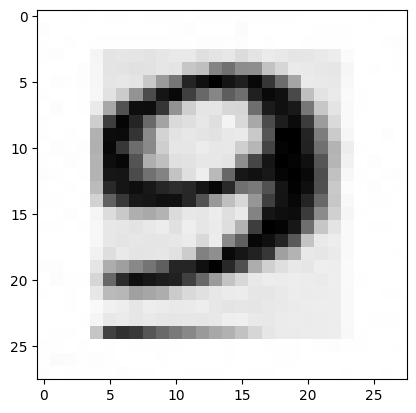

1/1 [==============================] - 0s 17ms/step
The number is probably a 5


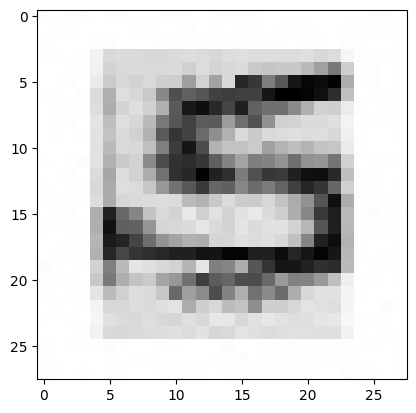

1/1 [==============================] - 0s 18ms/step
The number is probably a 2


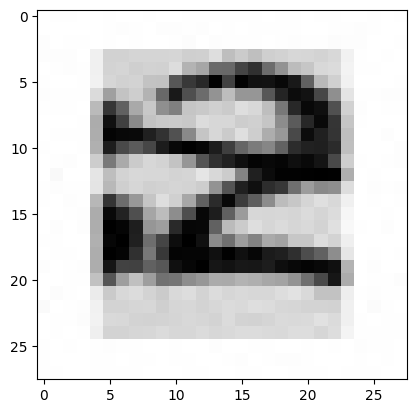

1/1 [==============================] - 0s 18ms/step
The number is probably a 2


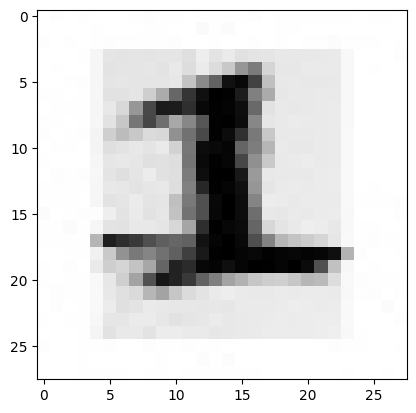

1/1 [==============================] - 0s 19ms/step
The number is probably a 2


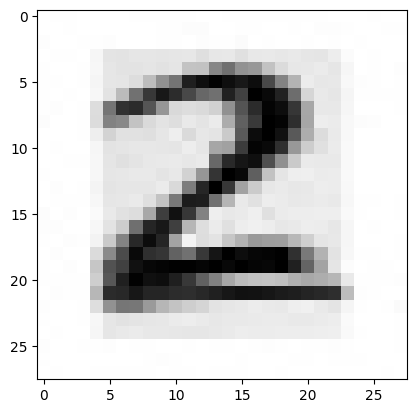

1/1 [==============================] - 0s 18ms/step
The number is probably a 2


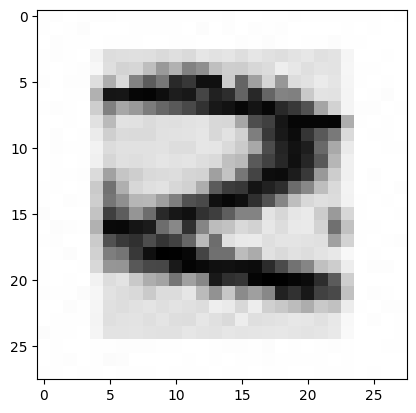

1/1 [==============================] - 0s 18ms/step
The number is probably a 6


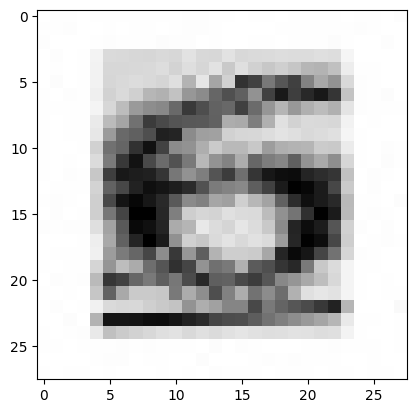

1/1 [==============================] - 0s 19ms/step
The number is probably a 4


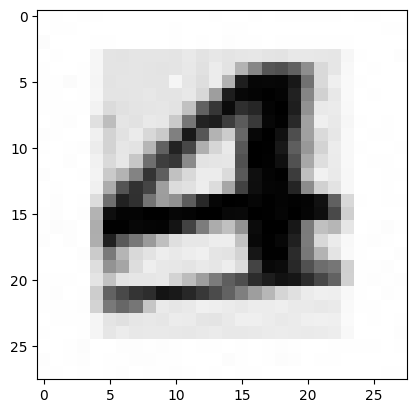

In [21]:
# Load custom images and predict them
image_number = 1
while os.path.isfile('test_subset/digit{}.jpg'.format(image_number)):
    try:
        
        img = cv2.imread('test_subset/digit{}.jpg'.format(image_number))[:,:,0]
        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1

dilated images 

check1
1/1 [==============================] - 0s 20ms/step
The number is probably a 2


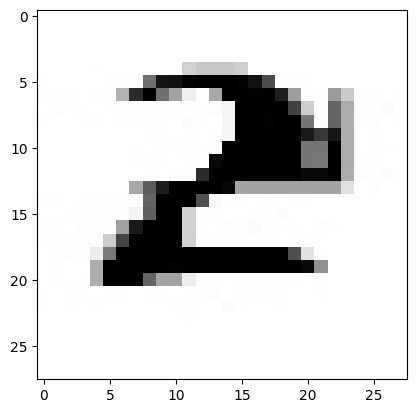

check2
1/1 [==============================] - 0s 19ms/step
The number is probably a 9


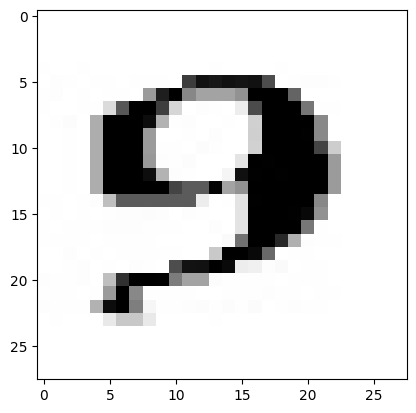

check3
1/1 [==============================] - 0s 20ms/step
The number is probably a 3


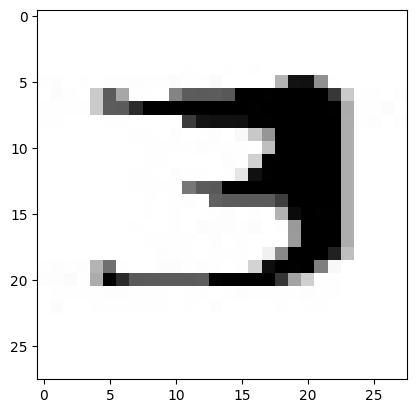

check4
1/1 [==============================] - 0s 18ms/step
The number is probably a 3


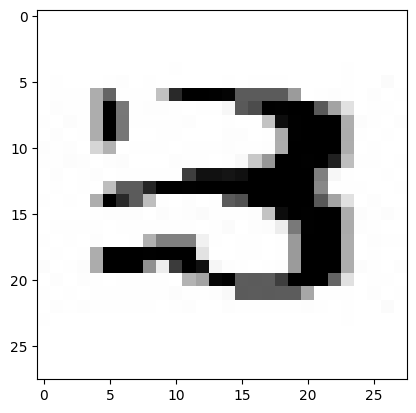

check5
1/1 [==============================] - 0s 23ms/step
The number is probably a 3


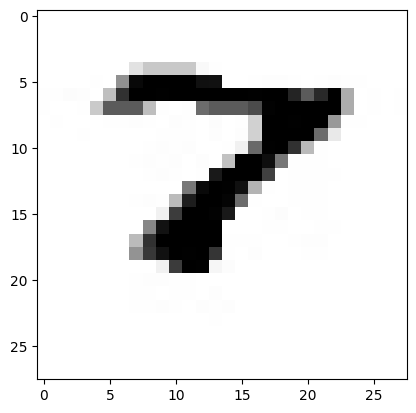

check6
1/1 [==============================] - 0s 20ms/step
The number is probably a 9


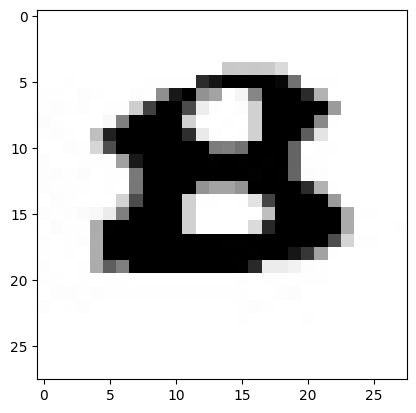

check7
1/1 [==============================] - 0s 18ms/step
The number is probably a 2


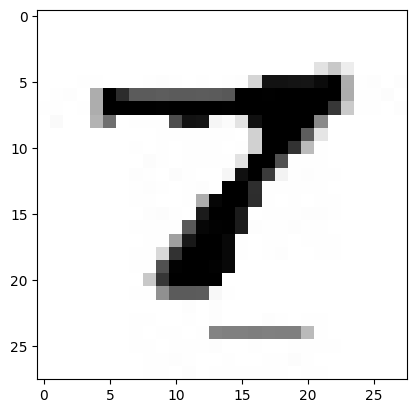

check8
1/1 [==============================] - 0s 20ms/step
The number is probably a 8


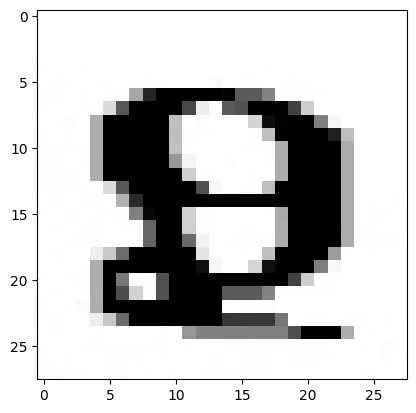

check9
1/1 [==============================] - 0s 19ms/step
The number is probably a 9


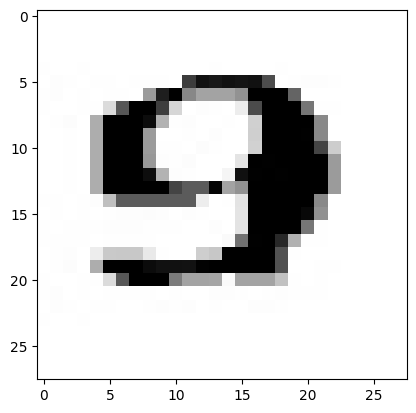

check10
1/1 [==============================] - 0s 18ms/step
The number is probably a 2


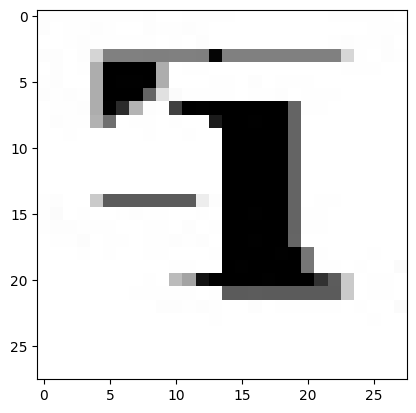

check11
1/1 [==============================] - 0s 18ms/step
The number is probably a 2


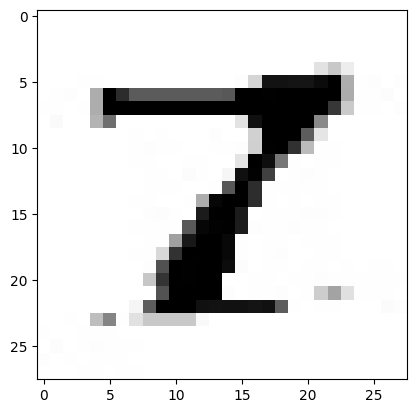

check12
1/1 [==============================] - 0s 22ms/step
The number is probably a 8


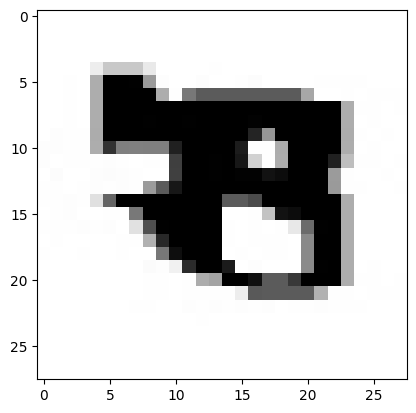

check13
1/1 [==============================] - 0s 18ms/step
The number is probably a 1


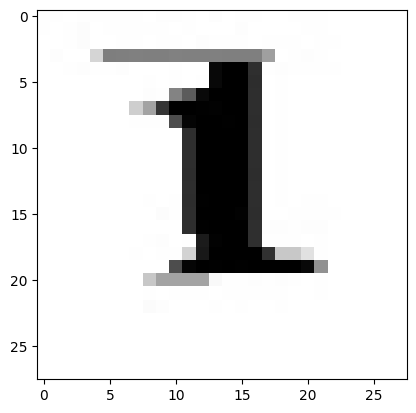

check14
1/1 [==============================] - 0s 18ms/step
The number is probably a 1


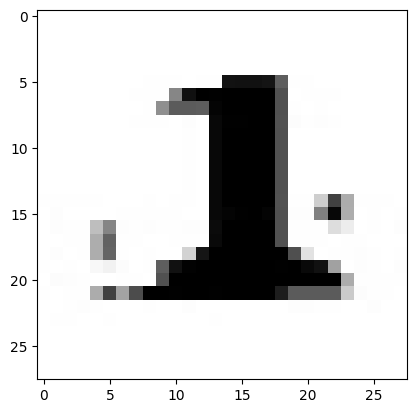

check15
1/1 [==============================] - 0s 17ms/step
The number is probably a 8


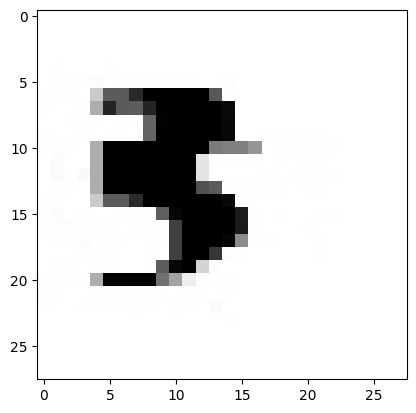

check16
1/1 [==============================] - 0s 24ms/step
The number is probably a 2


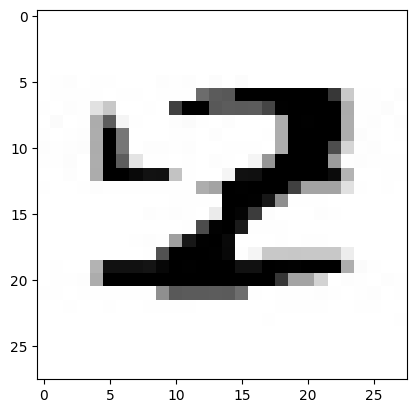

check17
1/1 [==============================] - 0s 17ms/step
The number is probably a 2


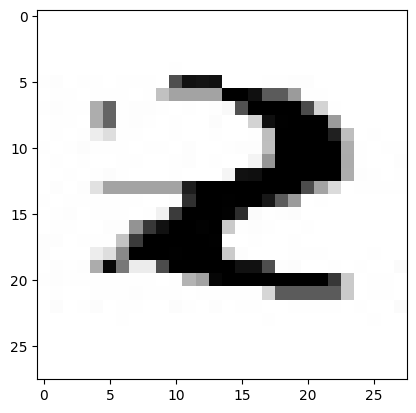

check18
1/1 [==============================] - 0s 19ms/step
The number is probably a 3


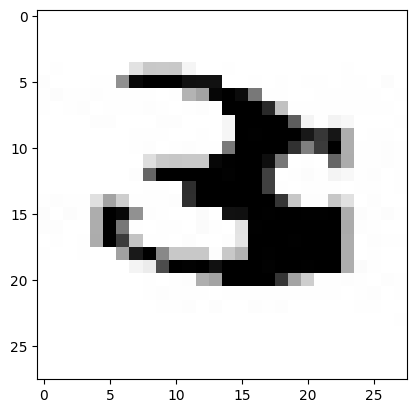

In [22]:
# Load custom images and predict them
image_number = 1
while os.path.isfile('dilated_test_subset/digit ({}).jpg'.format(image_number)):
    try:
        print(f"check{image_number}")
        img = cv2.imread('dilated_test_subset/digit ({}).jpg'.format(image_number))[:,:,0]
        img = cv2.resize(img, (28, 28))
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1